In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Cell 2: Simulate Employee Profiles data
n_employees = 200
departments = ['Sales', 'Engineering', 'HR', 'Support']
roles = ['Junior', 'Senior', 'Manager']

employee_data = {
    'Employee_ID': ['EMP' + str(i).zfill(3) for i in range(1, n_employees + 1)],
    'Department': np.random.choice(departments, n_employees),
    'Role': np.random.choice(roles, n_employees),
    'Hire_Date': pd.to_datetime(np.random.choice(pd.date_range('2018-01-01', '2023-01-01'), n_employees)),
    'Salary': np.random.randint(40000, 120000, n_employees),
}
employees_df = pd.DataFrame(employee_data)
employees_df['Tenure_Days'] = (pd.to_datetime('2025-03-14') - employees_df['Hire_Date']).dt.days

# Cell 3: Simulate Performance Reviews data
n_reviews = 300  # Some employees have multiple reviews
performance_data = {
    'Employee_ID': np.random.choice(employees_df['Employee_ID'], n_reviews),
    'Review_Date': pd.to_datetime(np.random.choice(pd.date_range('2020-01-01', '2025-03-14'), n_reviews)),
    'Performance_Score': np.random.randint(1, 6, n_reviews)  # 1-5 scale
}
performance_df = pd.DataFrame(performance_data)

# Cell 4: Simulate Time Tracking data
n_time_entries = 500
time_data = {
    'Employee_ID': np.random.choice(employees_df['Employee_ID'], n_time_entries),
    'Week_Ending': pd.to_datetime(np.random.choice(pd.date_range('2024-01-01', '2025-03-14'), n_time_entries)),
    'Hours_Worked': np.random.randint(30, 50, n_time_entries),
    'Overtime_Hours': np.random.randint(0, 15, n_time_entries)
}
time_df = pd.DataFrame(time_data)

# Cell 5: Save to CSV (optional) and preview
employees_df.to_csv('employees.csv', index=False)
performance_df.to_csv('performance.csv', index=False)
time_df.to_csv('time_tracking.csv', index=False)

print("Employees Data:")
print(employees_df.head())
print("\nPerformance Data:")
print(performance_df.head())
print("\nTime Tracking Data:")
print(time_df.head())

Employees Data:
  Employee_ID Department     Role  Hire_Date  Salary  Tenure_Days
0      EMP001         HR  Manager 2019-05-12  106387         2133
1      EMP002    Support  Manager 2018-10-29   58071         2328
2      EMP003      Sales   Junior 2018-06-30   99275         2449
3      EMP004         HR   Junior 2019-08-30  112369         2023
4      EMP005         HR   Senior 2021-01-27   51938         1507

Performance Data:
  Employee_ID Review_Date  Performance_Score
0      EMP063  2024-04-22                  2
1      EMP086  2023-12-13                  5
2      EMP059  2024-06-17                  1
3      EMP027  2023-01-23                  1
4      EMP177  2025-01-14                  3

Time Tracking Data:
  Employee_ID Week_Ending  Hours_Worked  Overtime_Hours
0      EMP003  2024-07-03            36               5
1      EMP160  2024-02-08            49               2
2      EMP013  2024-08-10            49              11
3      EMP120  2024-07-02            33              1

In [3]:
# Cell 1: Add Turnover_Status to Employees Data
# Assume employees with tenure < 1 year or low salary are more likely to leave
employees_df['Turnover_Status'] = np.where(
    (employees_df['Tenure_Days'] < 365) | (employees_df['Salary'] < 50000),
    1,  # Left
    np.random.choice([0, 1], len(employees_df), p=[0.8, 0.2])  # 80% stay, 20% leave
)

# Cell 2: Add Shift_Type to Time Tracking Data
shift_types = ['Day', 'Night']
time_df['Shift_Type'] = np.random.choice(shift_types, len(time_df))

# Cell 3: Preview updated data
print("Updated Employees Data with Turnover_Status:")
print(employees_df.head())
print("\nUpdated Time Tracking Data with Shift_Type:")
print(time_df.head())

Updated Employees Data with Turnover_Status:
  Employee_ID Department     Role  Hire_Date  Salary  Tenure_Days  \
0      EMP001         HR  Manager 2019-05-12  106387         2133   
1      EMP002    Support  Manager 2018-10-29   58071         2328   
2      EMP003      Sales   Junior 2018-06-30   99275         2449   
3      EMP004         HR   Junior 2019-08-30  112369         2023   
4      EMP005         HR   Senior 2021-01-27   51938         1507   

   Turnover_Status  
0                0  
1                0  
2                1  
3                0  
4                1  

Updated Time Tracking Data with Shift_Type:
  Employee_ID Week_Ending  Hours_Worked  Overtime_Hours Shift_Type
0      EMP003  2024-07-03            36               5      Night
1      EMP160  2024-02-08            49               2      Night
2      EMP013  2024-08-10            49              11      Night
3      EMP120  2024-07-02            33              11        Day
4      EMP125  2025-03-02         

In [5]:
# Cell 1: Check for missing values
print("Missing Values in Employees Data:")
print(employees_df.isnull().sum())
print("\nMissing Values in Performance Data:")
print(performance_df.isnull().sum())
print("\nMissing Values in Time Tracking Data:")
print(time_df.isnull().sum())

# Cell 2: Check for duplicates
print("\nDuplicates in Employees Data (by Employee_ID):")
print(employees_df['Employee_ID'].duplicated().sum())
print("Duplicates in Performance Data:")
print(performance_df.duplicated().sum())
print("Duplicates in Time Tracking Data:")
print(time_df.duplicated().sum())

# Cell 3: Aggregate Performance Data (average score per employee)
performance_avg = performance_df.groupby('Employee_ID').agg({
    'Performance_Score': 'mean'
}).reset_index()
performance_avg.rename(columns={'Performance_Score': 'Avg_Performance_Score'}, inplace=True)

# Cell 4: Aggregate Time Tracking Data (average hours and overtime per employee)
time_avg = time_df.groupby('Employee_ID').agg({
    'Hours_Worked': 'mean',
    'Overtime_Hours': 'mean',
    'Shift_Type': lambda x: x.mode()[0]  # Most common shift type
}).reset_index()
time_avg.rename(columns={
    'Hours_Worked': 'Avg_Hours_Worked',
    'Overtime_Hours': 'Avg_Overtime_Hours',
    'Shift_Type': 'Common_Shift_Type'
}, inplace=True)

# Cell 5: Merge the datasets
# Merge employees with performance
merged_df = pd.merge(employees_df, performance_avg, on='Employee_ID', how='left')
# Merge with time tracking
merged_df = pd.merge(merged_df, time_avg, on='Employee_ID', how='left')

# Cell 6: Fill missing values afte

Missing Values in Employees Data:
Employee_ID        0
Department         0
Role               0
Hire_Date          0
Salary             0
Tenure_Days        0
Turnover_Status    0
dtype: int64

Missing Values in Performance Data:
Employee_ID          0
Review_Date          0
Performance_Score    0
dtype: int64

Missing Values in Time Tracking Data:
Employee_ID       0
Week_Ending       0
Hours_Worked      0
Overtime_Hours    0
Shift_Type        0
dtype: int64

Duplicates in Employees Data (by Employee_ID):
0
Duplicates in Performance Data:
0
Duplicates in Time Tracking Data:
0


In [9]:
# Cell 3: Aggregate Performance Data (average score per employee)
performance_avg = performance_df.groupby('Employee_ID').agg({
    'Performance_Score': 'mean'
}).reset_index()
performance_avg.rename(columns={'Performance_Score': 'Avg_Performance_Score'}, inplace=True)

# Cell 4: Aggregate Time Tracking Data (average hours and overtime per employee)
time_avg = time_df.groupby('Employee_ID').agg({
    'Hours_Worked': 'mean',
    'Overtime_Hours': 'mean',
    'Shift_Type': lambda x: x.mode()[0]  # Most common shift type
}).reset_index()
time_avg.rename(columns={
    'Hours_Worked': 'Avg_Hours_Worked',
    'Overtime_Hours': 'Avg_Overtime_Hours',
    'Shift_Type': 'Common_Shift_Type'
}, inplace=True)

# Cell 5: Merge the datasets
# Merge employees with performance
merged_df = pd.merge(employees_df, performance_avg, on='Employee_ID', how='left')
# Merge with time tracking
merged_df = pd.merge(merged_df, time_avg, on='Employee_ID', how='left')

# Cell 6: Fill missing values after merge (without inplace)
merged_df['Avg_Performance_Score'] = merged_df['Avg_Performance_Score'].fillna(merged_df['Avg_Performance_Score'].mean())
merged_df['Avg_Hours_Worked'] = merged_df['Avg_Hours_Worked'].fillna(merged_df['Avg_Hours_Worked'].mean())
merged_df['Avg_Overtime_Hours'] = merged_df['Avg_Overtime_Hours'].fillna(0)  # Assume no overtime if no data
merged_df['Common_Shift_Type'] = merged_df['Common_Shift_Type'].fillna('Unknown')

# Cell 7: Preview the merged dataset
print("\nMerged Dataset:")
print(merged_df.head())


Merged Dataset:
  Employee_ID Department     Role  Hire_Date  Salary  Tenure_Days  \
0      EMP001         HR  Manager 2019-05-12  106387         2133   
1      EMP002    Support  Manager 2018-10-29   58071         2328   
2      EMP003      Sales   Junior 2018-06-30   99275         2449   
3      EMP004         HR   Junior 2019-08-30  112369         2023   
4      EMP005         HR   Senior 2021-01-27   51938         1507   

   Turnover_Status  Avg_Performance_Score  Avg_Hours_Worked  \
0                0               3.500000         36.500000   
1                0               2.894444         37.666667   
2                1               2.000000         40.500000   
3                0               2.333333         37.500000   
4                1               3.500000         40.500000   

   Avg_Overtime_Hours Common_Shift_Type  
0            7.250000               Day  
1            5.666667               Day  
2            6.000000             Night  
3           10.500000

In [17]:
# Cell 6: Fill missing values after merge and round
merged_df['Avg_Performance_Score'] = merged_df['Avg_Performance_Score'].fillna(merged_df['Avg_Performance_Score'].mean()).round(2)
merged_df['Avg_Hours_Worked'] = merged_df['Avg_Hours_Worked'].fillna(merged_df['Avg_Hours_Worked'].mean()).round(2)
merged_df['Avg_Overtime_Hours'] = merged_df['Avg_Overtime_Hours'].fillna(0).round(2)
merged_df['Common_Shift_Type'] = merged_df['Common_Shift_Type'].fillna('Unknown')

# Cell 7: Preview the merged dataset
print("\nMerged Dataset:")
print(merged_df.head())


Merged Dataset:
  Employee_ID Department     Role  Hire_Date  Salary  Tenure_Days  \
0      EMP001         HR  Manager 2019-05-12  106387         2133   
1      EMP002    Support  Manager 2018-10-29   58071         2328   
2      EMP003      Sales   Junior 2018-06-30   99275         2449   
3      EMP004         HR   Junior 2019-08-30  112369         2023   
4      EMP005         HR   Senior 2021-01-27   51938         1507   

   Turnover_Status  Avg_Performance_Score  Avg_Hours_Worked  \
0                0                   3.50             36.50   
1                0                   2.89             37.67   
2                1                   2.00             40.50   
3                0                   2.33             37.50   
4                1                   3.50             40.50   

   Avg_Overtime_Hours Common_Shift_Type  
0                7.25               Day  
1                5.67               Day  
2                6.00             Night  
3               10.50

Overall Turnover Rate: 29.00%

Average Performance Score by Department:
Department
Engineering    3.02
HR             2.98
Sales          2.83
Support        2.75
Name: Avg_Performance_Score, dtype: float64

Average Overtime Hours by Shift Type:
Common_Shift_Type
Day        7.10
Night      6.82
Unknown    0.00
Name: Avg_Overtime_Hours, dtype: float64


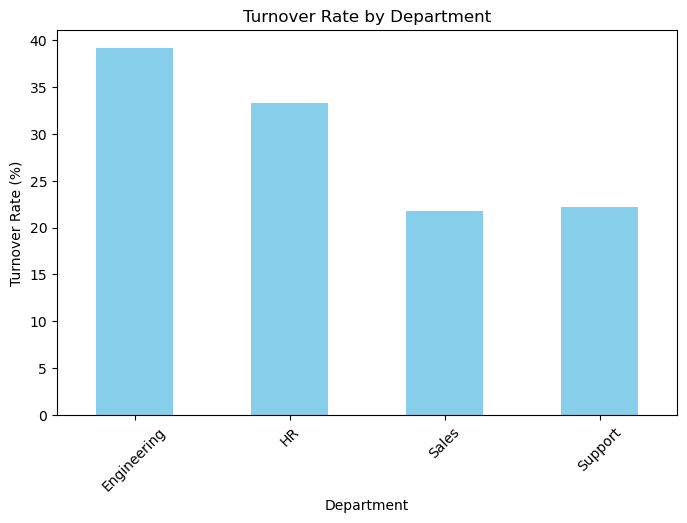

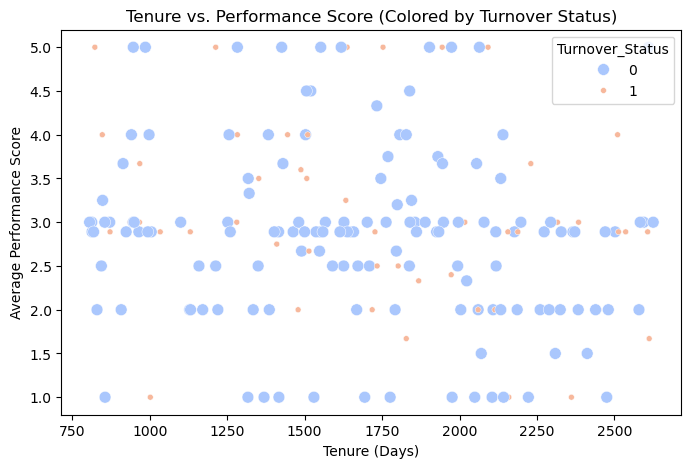

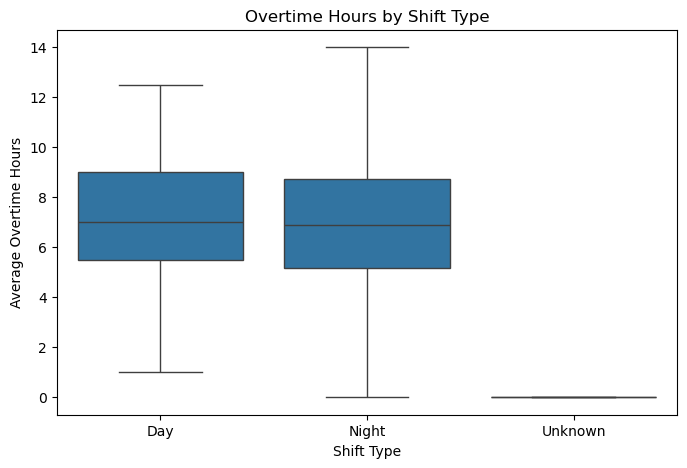

In [23]:
# Cell 1: Calculate KPIs
# Overall turnover rate
turnover_rate = merged_df['Turnover_Status'].mean() * 100
print(f"Overall Turnover Rate: {turnover_rate:.2f}%")

# Average performance score by department
avg_performance_by_dept = merged_df.groupby('Department')['Avg_Performance_Score'].mean().round(2)
print("\nAverage Performance Score by Department:")
print(avg_performance_by_dept)

# Average overtime hours by shift type
avg_overtime_by_shift = merged_df.groupby('Common_Shift_Type')['Avg_Overtime_Hours'].mean().round(2)
print("\nAverage Overtime Hours by Shift Type:")
print(avg_overtime_by_shift)

# Cell 2: Visualization 1 - Turnover Rate by Department
turnover_by_dept = merged_df.groupby('Department')['Turnover_Status'].mean() * 100
plt.figure(figsize=(8, 5))
turnover_by_dept.plot(kind='bar', color='skyblue')
plt.title('Turnover Rate by Department')
plt.xlabel('Department')
plt.ylabel('Turnover Rate (%)')
plt.xticks(rotation=45)
plt.show()

# Cell 3: Visualization 2 - Tenure vs. Performance Score (colored by Turnover Status)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_df, x='Tenure_Days', y='Avg_Performance_Score', hue='Turnover_Status', palette='coolwarm', size='Turnover_Status')
plt.title('Tenure vs. Performance Score (Colored by Turnover Status)')
plt.xlabel('Tenure (Days)')
plt.ylabel('Average Performance Score')
plt.show()

# Cell 4: Visualization 3 - Overtime Hours by Shift Type (fix warning)
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged_df, x='Common_Shift_Type', y='Avg_Overtime_Hours')  # Removed palette since hue is not used
plt.title('Overtime Hours by Shift Type')
plt.xlabel('Shift Type')
plt.ylabel('Average Overtime Hours')
plt.show()

In [31]:
# Save the merged dataset as a CSV file
merged_df.to_csv('merged_data.csv', index=False)
print("Data saved as 'merged_data.csv'")

Data saved as 'merged_data.csv'
